## Etiquetas por dataset

# AFEW

In [7]:
import os
import pandas as pd

def datos_AFEW(ruta):
    datos = []
    for carpeta_actual, carpetas, archivos in os.walk(ruta):
        for archivo in archivos:
            ruta_completa = os.path.join(carpeta_actual, archivo)
            carpetas_split = carpeta_actual.split(os.sep)
            nombre_carpeta = carpetas_split[-2] if len(carpetas_split) >= 2 else ''
            nombre_archivo, extension = os.path.splitext(archivo)
            datos.append((ruta_completa, nombre_carpeta, nombre_archivo))
    df = pd.DataFrame(datos, columns=['Emocion', 'Tipo', 'Nombre_Archivo'])
    return df

ruta_carpeta = r'D:\sentirobots\Datasets\AFEW\Datos\Videos_AFEW'

df_AFEW = datos_AFEW(ruta_carpeta)
df_AFEW['Emocion'] = df_AFEW['Emocion'].apply(lambda x: x.split(os.sep)[-2])
df_AFEW

,Emocion,Tipo,Nombre_Archivo
0,Angry,Videos_AFEW_Train,000046280
1,Angry,Videos_AFEW_Train,000223480
2,Angry,Videos_AFEW_Train,000429620
3,Angry,Videos_AFEW_Train,000450454
4,Angry,Videos_AFEW_Train,000505440
...,...,...,...
1151,Surprise,Videos_AFEW_Val,011329120
1152,Surprise,Videos_AFEW_Val,012246840
1153,Surprise,Videos_AFEW_Val,012535447
1154,Surprise,Videos_AFEW_Val,014527960


In [8]:
df_AFEW['Tipo'] = df_AFEW['Tipo'].astype(str)

mapeo_tipo_AFEW = {
    'Videos_AFEW_Train': 'train',
    'Videos_AFEW_Val': 'val'
}

df_AFEW['Tipo'] = df_AFEW['Tipo'].map(mapeo_tipo_AFEW)
df_AFEW['BD'] = 'AFEW'
df_AFEW

,Emocion,Tipo,Nombre_Archivo,BD
0,Angry,train,000046280,AFEW
1,Angry,train,000223480,AFEW
2,Angry,train,000429620,AFEW
3,Angry,train,000450454,AFEW
4,Angry,train,000505440,AFEW
...,...,...,...,...
1151,Surprise,val,011329120,AFEW
1152,Surprise,val,012246840,AFEW
1153,Surprise,val,012535447,AFEW
1154,Surprise,val,014527960,AFEW


### Otro AFEW para rescatar rutas y otros para la unificación

In [3]:
import os
import pandas as pd

def datos_AFEWd(ruta):
    datos = []
    for carpeta_actual, carpetas, archivos in os.walk(ruta):
        for archivo in archivos:
            ruta_completa = os.path.join(carpeta_actual, archivo)
            carpetas_split = carpeta_actual.split(os.sep)
            nombre_carpeta = carpetas_split[-2] if len(carpetas_split) >= 2 else ''
            nombre_archivo, extension = os.path.splitext(archivo)
            sin_archivo = os.path.dirname(ruta_completa)
            datos.append((ruta_completa, nombre_carpeta, nombre_archivo, sin_archivo))
    df = pd.DataFrame(datos, columns=['Emocion', 'Tipo', 'Nombre_Archivo', 'RutaSinArchivo'])
    return df

ruta_carpeta = r'D:\sentirobots\Datasets\AFEW\Datos\Caras_AFEW\Val\Faces'

afeew = datos_AFEWd(ruta_carpeta)
afeew['Emocion'] = afeew['Emocion'].apply(lambda x: x.split(os.sep)[-2])
afeew['RutaCompletaConArchivo'] = afeew.apply(lambda row: os.path.join(row['RutaSinArchivo'], row['Nombre_Archivo'] + os.path.splitext(row['Emocion'])[1]), axis=1)
afeew


In [4]:
afeew['Tipo'] = afeew['Tipo'].astype(str)

# mapeo_tipo_AFEWd = {
#     'Videos_AFEW_Train': 'train',
#     'Videos_AFEW_Val': 'val'
# }
#afeew['Tipo'] = 'train'
afeew['Tipo'] = 'val'
afeew['BD'] = 'AFEW'
afeew

In [5]:
afeew.to_csv(r"D:\sentirobots\Datasets\etiquetas-AFEW-Val.csv", index=False)
print("Se ha generado el archivo de etiquetas")

# MELD

In [9]:
ruta_archivo_csv = r"D:\sentirobots\Datasets\MELD\train\train_sent_emo.csv"

df_emociones_MELD_train = pd.read_csv(ruta_archivo_csv)
df_emociones_MELD_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


In [10]:
def concatenar_valores(row):
    dialogue_id = "dia" + str(row["Dialogue_ID"])
    utterance_id = "utt" + str(row["Utterance_ID"])
    return dialogue_id + "_" + utterance_id

df_emociones_MELD_train["Nombre_Archivo"] = df_emociones_MELD_train.apply(concatenar_valores, axis=1)
df_emociones_MELD_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4
...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",dia1038_utt13
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",dia1038_utt14
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",dia1038_utt15
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",dia1038_utt16


In [11]:
def tipo_train(row):
    tipe = "train"
    return tipe

df_emociones_MELD_train["Tipo"] = df_emociones_MELD_train.apply(tipo_train, axis=1)
df_emociones_MELD_train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo,Tipo
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0,train
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1,train
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2,train
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3,train
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",dia1038_utt13,train
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",dia1038_utt14,train
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",dia1038_utt15,train
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",dia1038_utt16,train


In [12]:
print(df_emociones_MELD_train.iloc[0])

Sr No.                                                            1
Utterance         also I was the point person on my companys tr...
Speaker                                                    Chandler
Emotion                                                     neutral
Sentiment                                                   neutral
Dialogue_ID                                                       0
Utterance_ID                                                      0
Season                                                            8
Episode                                                          21
StartTime                                              00:16:16,059
EndTime                                                00:16:21,731
Nombre_Archivo                                            dia0_utt0
Tipo                                                          train
Name: 0, dtype: object


In [13]:
rutas_archivo_csv = r"D:\sentirobots\Datasets\MELD\dev\dev_sent_emo.csv"

df_emociones_MELD_dev = pd.read_csv(rutas_archivo_csv)
df_emociones_MELD_dev

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"
...,...,...,...,...,...,...,...,...,...,...,...
1103,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876"
1104,1175,What? Oh my God! Im gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965"
1105,1176,Im gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967"
1106,1177,I mean its the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928"


In [14]:
df_emociones_MELD_dev["Nombre_Archivo"] = df_emociones_MELD_dev.apply(concatenar_valores, axis=1)
df_emociones_MELD_dev

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",dia0_utt0
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",dia0_utt1
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",dia1_utt0
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",dia1_utt1
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",dia1_utt2
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876",dia113_utt9
1104,1175,What? Oh my God! Im gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965",dia113_utt10
1105,1176,Im gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967",dia113_utt11
1106,1177,I mean its the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928",dia113_utt12


In [15]:
def tipo_dev(row):
    tipe = "dev"
    return tipe

df_emociones_MELD_dev["Tipo"] = df_emociones_MELD_dev.apply(tipo_dev, axis=1)
df_emociones_MELD_dev

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo,Tipo
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",dia0_utt0,dev
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",dia0_utt1,dev
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",dia1_utt0,dev
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",dia1_utt1,dev
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",dia1_utt2,dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876",dia113_utt9,dev
1104,1175,What? Oh my God! Im gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965",dia113_utt10,dev
1105,1176,Im gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967",dia113_utt11,dev
1106,1177,I mean its the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928",dia113_utt12,dev


In [16]:
df_emociones_MELD_dev.iloc[0]

Sr No.                                                         1
Utterance         Oh my God, hes lost it. Hes totally lost it.
Speaker                                                   Phoebe
Emotion                                                  sadness
Sentiment                                               negative
Dialogue_ID                                                    0
Utterance_ID                                                   0
Season                                                         4
Episode                                                        7
StartTime                                           00:20:57,256
EndTime                                             00:21:00,049
Nombre_Archivo                                         dia0_utt0
Tipo                                                         dev
Name: 0, dtype: object

In [17]:
df_MELD = pd.concat([df_emociones_MELD_dev, df_emociones_MELD_train])
df_MELD['Emocion'] = df_MELD['Emotion'].copy()
df_MELD

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo,Tipo,Emocion
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",dia0_utt0,dev,sadness
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",dia0_utt1,dev,surprise
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",dia1_utt0,dev,neutral
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",dia1_utt1,dev,joy
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",dia1_utt2,dev,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",dia1038_utt13,train,neutral
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",dia1038_utt14,train,neutral
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",dia1038_utt15,train,surprise
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",dia1038_utt16,train,neutral


In [18]:
mapeo_emociones_MELD = {
    'neutral': 'Neutral',
    'anger': 'Angry',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'joy': 'Happy',
    'sadness': 'Sad',
    'surprise': 'Surprise',
}

df_MELD['Emocion'] = df_MELD['Emocion'].map(mapeo_emociones_MELD)
df_MELD

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo,Tipo,Emocion
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",dia0_utt0,dev,Sad
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",dia0_utt1,dev,Surprise
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",dia1_utt0,dev,Neutral
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",dia1_utt1,dev,Happy
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",dia1_utt2,dev,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",dia1038_utt13,train,Neutral
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",dia1038_utt14,train,Neutral
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",dia1038_utt15,train,Surprise
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",dia1038_utt16,train,Neutral


In [19]:
mapeo_tipo_MELD = {
    'train': 'train',
    'dev': 'val'
}

df_MELD['Tipo'] = df_MELD['Tipo'].map(mapeo_tipo_MELD)
df_MELD

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,Nombre_Archivo,Tipo,Emocion
0,1,"Oh my God, hes lost it. Hes totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049",dia0_utt0,val,Sad
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261",dia0_utt1,val,Surprise
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915",dia1_utt0,val,Neutral
3,4,Youre a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960",dia1_utt1,val,Happy
4,5,"Aww, man, now we wont be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505",dia1_utt2,val,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799",dia1038_utt13,train,Neutral
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594",dia1038_utt14,train,Neutral
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520",dia1038_utt15,train,Surprise
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274",dia1038_utt16,train,Neutral


In [20]:
tipos_datos = df_MELD.dtypes
print(tipos_datos)

Sr No.             int64
Utterance         object
Speaker           object
Emotion           object
Sentiment         object
Dialogue_ID        int64
Utterance_ID       int64
Season             int64
Episode            int64
StartTime         object
EndTime           object
Nombre_Archivo    object
Tipo              object
Emocion           object
dtype: object


In [21]:
df_MELD_ = df_MELD[["Nombre_Archivo", "Tipo", "Emocion"]].copy()
df_MELD_['BD'] = 'MELD'
df_MELD_

,Nombre_Archivo,Tipo,Emocion,BD
0,dia0_utt0,val,Sad,MELD
1,dia0_utt1,val,Surprise,MELD
2,dia1_utt0,val,Neutral,MELD
3,dia1_utt1,val,Happy,MELD
4,dia1_utt2,val,Sad,MELD
...,...,...,...,...
9984,dia1038_utt13,train,Neutral,MELD
9985,dia1038_utt14,train,Neutral,MELD
9986,dia1038_utt15,train,Surprise,MELD
9987,dia1038_utt16,train,Neutral,MELD


In [22]:
#df_MELD.to_csv(ruta_salida_csv, index=False)

# AffWild2

In [23]:
import pandas as pd

df_AffWild2 = pd.read_csv(r'D:\sentirobots\Datasets\AffWild2\Audios_AffWild2\Audios_caras_emociones_imagen_AffWild2.csv')

columnas_a_eliminar = ['nombre_sin_ext', 'contador', 'Carpeta', 'Archivo_deseado', 'Ruta_Antigua', 'Ruta_Nueva', 'KEY']

df_AffWild2 = df_AffWild2.drop(columns=columnas_a_eliminar)
df_AffWild2['BD'] = 'AffWild2'
df_AffWild2

C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_15252\1899601156.py:4: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_AffWild2 = pd.read_csv(r'D:\sentirobots\Datasets\AffWild2\Audios_AffWild2\Audios_caras_emociones_imagen_AffWild2.csv')


,carpeta,emotion,carpeta_base,BD
0,1-30-1280x720_1,4,train,AffWild2
1,1-30-1280x720_1,4,train,AffWild2
2,1-30-1280x720_1,4,train,AffWild2
3,1-30-1280x720_1,4,train,AffWild2
4,1-30-1280x720_1,4,train,AffWild2
...,...,...,...,...
583505,video94_1,0,train,AffWild2
583506,video94_1,0,train,AffWild2
583507,video94_1,0,train,AffWild2
583508,video94_1,0,train,AffWild2


In [24]:
df_affwild2t = df_AffWild2[df_AffWild2['carpeta_base'] == 'val'].copy()
df_affwild2t

,carpeta,emotion,carpeta_base,BD
108003,24-30-1920x1080-1_1,4,val,AffWild2
108004,24-30-1920x1080-1_1,4,val,AffWild2
108005,24-30-1920x1080-1_1,4,val,AffWild2
108006,24-30-1920x1080-1_1,4,val,AffWild2
108007,24-30-1920x1080-1_1,4,val,AffWild2
...,...,...,...,...
579404,video73_43,4,val,AffWild2
579405,video73_43,4,val,AffWild2
579406,video73_43,4,val,AffWild2
579407,video73_43,4,val,AffWild2


In [25]:
AffWild2 = df_AffWild2.loc[df_AffWild2.duplicated(subset=['carpeta']) == False]
AffWild2

,carpeta,emotion,carpeta_base,BD
0,1-30-1280x720_1,4,train,AffWild2
2331,1-30-1280x720_2,0,train,AffWild2
2644,1-30-1280x720_4,0,train,AffWild2
2740,1-30-1280x720_5,4,train,AffWild2
2812,1-30-1280x720_7,0,train,AffWild2
...,...,...,...,...
583148,video93_1,4,train,AffWild2
583211,video93_3,1,train,AffWild2
583299,video93_5,4,train,AffWild2
583433,video93_7,1,train,AffWild2


In [26]:
AffWild2['emotion'] = AffWild2['emotion'].astype(int)

mapeo_emociones = {
    0: 'Neutral',
    1: 'Angry',
    2: 'Disgust',
    3: 'Fear',
    4: 'Happy',
    5: 'Sad',
    6: 'Surprise'
}

AffWild2['emotion'] = AffWild2['emotion'].map(mapeo_emociones)
AffWild2

C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_15252\3107573479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AffWild2['emotion'] = AffWild2['emotion'].astype(int)
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_15252\3107573479.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AffWild2['emotion'] = AffWild2['emotion'].map(mapeo_emociones)


,carpeta,emotion,carpeta_base,BD
0,1-30-1280x720_1,Happy,train,AffWild2
2331,1-30-1280x720_2,Neutral,train,AffWild2
2644,1-30-1280x720_4,Neutral,train,AffWild2
2740,1-30-1280x720_5,Happy,train,AffWild2
2812,1-30-1280x720_7,Neutral,train,AffWild2
...,...,...,...,...
583148,video93_1,Happy,train,AffWild2
583211,video93_3,Angry,train,AffWild2
583299,video93_5,Happy,train,AffWild2
583433,video93_7,Angry,train,AffWild2


In [27]:
nuevos_nombres = {
    "carpeta": "Nombre_Archivo", 
    "emotion": "Emocion",
    "carpeta_base": "Tipo"                  
}

AffWild2.rename(columns=nuevos_nombres, inplace=True)
AffWild2

C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_15252\3380060045.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AffWild2.rename(columns=nuevos_nombres, inplace=True)


,Nombre_Archivo,Emocion,Tipo,BD
0,1-30-1280x720_1,Happy,train,AffWild2
2331,1-30-1280x720_2,Neutral,train,AffWild2
2644,1-30-1280x720_4,Neutral,train,AffWild2
2740,1-30-1280x720_5,Happy,train,AffWild2
2812,1-30-1280x720_7,Neutral,train,AffWild2
...,...,...,...,...
583148,video93_1,Happy,train,AffWild2
583211,video93_3,Angry,train,AffWild2
583299,video93_5,Happy,train,AffWild2
583433,video93_7,Angry,train,AffWild2


# MAFW

In [28]:
# ruta_archi_csv = r"D:\sentirobots\Datasets\MAFW\MAFW-20230614T154044Z-003\MAFW\Labels\annotation.xlsx"

# df_emociones_MAFW = pd.read_excel(ruta_archi_csv)

# df_emociones_MAFW

In [29]:
# columna_max = df_emociones_MAFW.iloc[:, 2:].idxmax(axis=1) 

# df_MAFW = pd.DataFrame({'clip': df_emociones_MAFW['clip'], 'Emocion': columna_max})
# df_MAFW.columns = ['Nombre_Archivo', 'Emocion']
# df_MAFW['Nombre_Archivo'] = df_MAFW['Nombre_Archivo'].str.replace('.mp4', '')
# df_MAFW['Tipo'] = "test"
# df_MAFW['Frames'] = '00'
# df_MAFW

In [30]:
# #df_MAFW['Emocion'] = df_MAFW['Emocion'].astype(str)

# mapeo_emociones_MAFW = {
#     'neutral': 'Neutral',
#     'anger': 'Angry',
#     'disgust': 'Disgust',
#     'fear': 'Fear',
#     'happiness': 'Happy',
#     'sadness': 'Sad',
#     'surprise': 'Surprise',
#     'helplessness': 'helplessness',
#     'anxiety': 'anxiety',
#     'disappointment': 'disappointment',
#     'contempt': 'contempt'
# }

# df_MAFW['Emocion'] = df_MAFW['Emocion'].map(mapeo_emociones_MAFW)
# df_MAFW['BD'] = 'MAFW'
# df_MAFW

In [31]:
# import matplotlib.pyplot as plt

# emocion_counts = df_MAFW['Emocion'].value_counts()

# plt.figure(figsize=(10, 6))
# plt.bar(emocion_counts.index, emocion_counts.values)
# plt.xlabel('Emocion')
# plt.ylabel('Count')
# plt.title('Distribución de Emociones')
# plt.xticks(rotation=90)
# plt.show()

In [32]:
# print(emocion_counts)

In [33]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# columnas_emociones = ['invalid', 'anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness',
#                       'surprise', 'contempt', 'anxiety', 'helplessness', 'disappointment']
# df_emociones_MAFW[columnas_emociones] = df_emociones_MAFW[columnas_emociones].apply(pd.to_numeric)

# df_emociones_MAFW['emocion_predominante'] = df_emociones_MAFW[columnas_emociones].idxmax(axis=1)
# df_correlacion = df_emociones_MAFW[columnas_emociones].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(df_correlacion, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)

# plt.title('Mapa de Calor de Correlaciones')
# plt.xlabel('Emociones')
# plt.ylabel('Emociones')

# plt.show()

In [34]:
# df_correlacion

In [35]:
# emociones_mayor_correlacion = {}

# for columna in df_correlacion.columns:
#     emocion_max_corr = df_correlacion[columna].drop(columna).idxmax()
#     correlacion_max = df_correlacion.loc[emocion_max_corr, columna]  # Obtener el valor de correlación

#     emociones_mayor_correlacion[columna] = (emocion_max_corr, correlacion_max)

# for emocion, (emocion_max_corr, correlacion_max) in emociones_mayor_correlacion.items():
#     print(f"La emoción con mayor correlación para la emoción {emocion} es {emocion_max_corr}. Correlación: {correlacion_max}")

In [36]:
# import matplotlib.pyplot as plt

# emociones_mayor_correlacion = {}

# for columna in df_correlacion.columns:
#     emocion_max_corr = df_correlacion[columna].drop(columna).idxmax()
    
#     emociones_mayor_correlacion[columna] = emocion_max_corr

# valores_correlacion = df_correlacion.lookup(df_correlacion.columns, emociones_mayor_correlacion.values())

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.bar(emociones_mayor_correlacion.keys(), valores_correlacion, color='blue')

# ax.set_xlabel('Emoción')
# ax.set_ylabel('Correlación')
# ax.set_title('Emoción con Mayor Correlación por Columna')

# plt.xticks(rotation=45)

# plt.show()

In [37]:
# emociones_mayor_correlacion = {}

# emociones_interes = ["disappointment", "contempt", "anxiety", "helplessness"]


# for emocion in emociones_interes:
#     max_correlacion = df_correlacion.loc[emocion].drop(emocion).max()
    
#     emocion_max_corr = df_correlacion.loc[emocion].drop(emocion).idxmax()
    
#     emociones_mayor_correlacion[emocion] = (emocion_max_corr, max_correlacion)

# for emocion, (emocion_max_corr, max_correlacion) in emociones_mayor_correlacion.items():
#     print(f"La correlación más alta para la emoción {emocion} es {max_correlacion:.3f} con la emoción {emocion_max_corr}")

# Emociones unificadas

In [38]:
unidos_df = pd.concat([AffWild2, df_MELD_, df_AFEW], ignore_index=True)
unidos_df

,Nombre_Archivo,Emocion,Tipo,BD
0,1-30-1280x720_1,Happy,train,AffWild2
1,1-30-1280x720_2,Neutral,train,AffWild2
2,1-30-1280x720_4,Neutral,train,AffWild2
3,1-30-1280x720_5,Happy,train,AffWild2
4,1-30-1280x720_7,Neutral,train,AffWild2
...,...,...,...,...
17395,011329120,Surprise,val,AFEW
17396,012246840,Surprise,val,AFEW
17397,012535447,Surprise,val,AFEW
17398,014527960,Surprise,val,AFEW


In [40]:
bd_cous = unidos_df['BD'].value_counts()
print(bd_cous)

MELD        11097
AffWild2     5147
AFEW         1156
Name: BD, dtype: int64


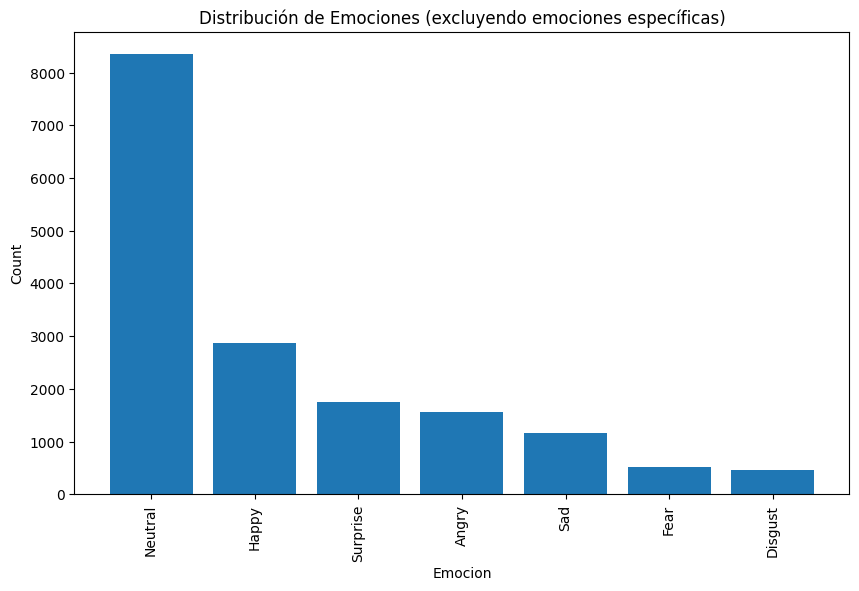

In [41]:
import matplotlib.pyplot as plt


# emociones_excluidas = ['Otra', 'disappointment', 'contempt', 'helplessness', 'anxiety']


# df_filtrado = df_sin_duplicados_de_AffWild2[~df_sin_duplicados_de_AffWild2['Emocion'].isin(emociones_excluidas)]

contar_emociones = unidos_df['Emocion'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(contar_emociones.index, contar_emociones.values)
plt.xlabel('Emocion')
plt.ylabel('Count')
plt.title('Distribución de Emociones (excluyendo emociones específicas)')
plt.xticks(rotation=90)
plt.show()

In [42]:
print(contar_emociones)

Neutral     8346
Happy       2879
Surprise    1746
Angry       1557
Sad         1164
Fear         517
Disgust      461
Name: Emocion, dtype: int64


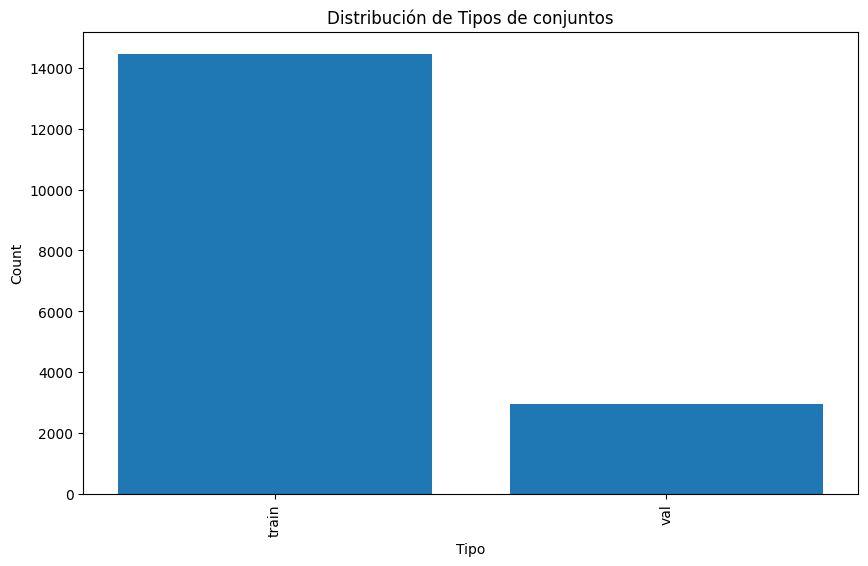

In [43]:
import matplotlib.pyplot as plt

contar_tipo_unidas = unidos_df['Tipo'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(contar_tipo_unidas.index, contar_tipo_unidas.values)
plt.xlabel('Tipo')
plt.ylabel('Count')
plt.title('Distribución de Tipos de conjuntos')
plt.xticks(rotation=90)
plt.show()

In [44]:
print(contar_tipo_unidas)

train    14442
val       2958
Name: Tipo, dtype: int64


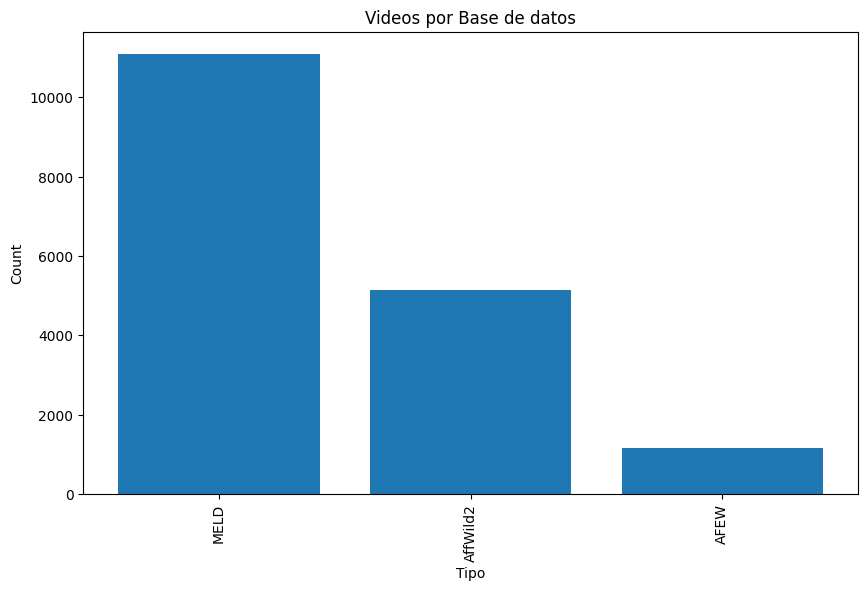

In [45]:
contar_videos_unidos = unidos_df['BD'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(contar_videos_unidos.index, contar_videos_unidos.values)
plt.xlabel('Tipo')
plt.ylabel('Count')
plt.title('Videos por Base de datos')
plt.xticks(rotation=90)
plt.show()

In [46]:
print(contar_videos_unidos)

MELD        11097
AffWild2     5147
AFEW         1156
Name: BD, dtype: int64


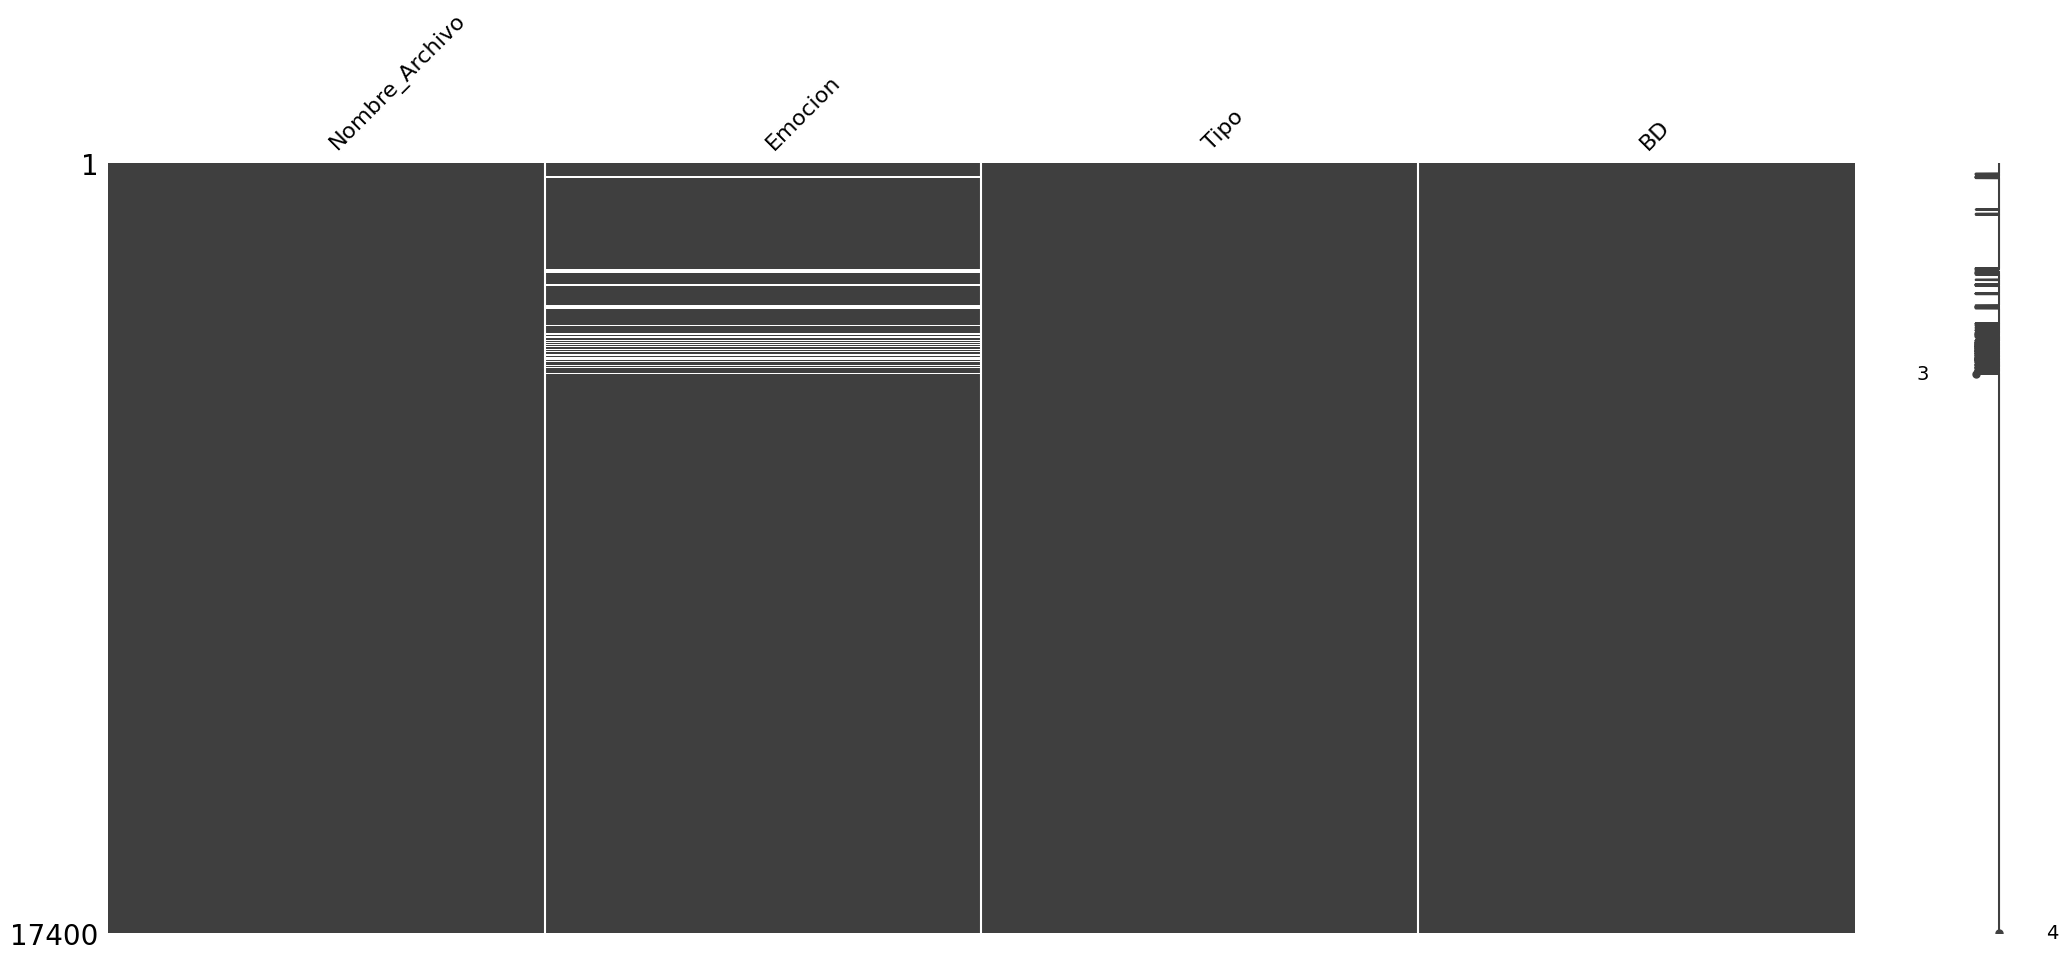

In [48]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(unidos_df)
plt.show()

In [55]:
df_valores_nulos = unidos_df.loc[unidos_df['Emocion'].isnull()]
df_valores_nulos

,Nombre_Archivo,Emocion,Tipo,BD
240,5-60-1920x1080-1_2,NaN,train,AffWild2
241,5-60-1920x1080-1_4,NaN,train,AffWild2
242,5-60-1920x1080-1_6,NaN,train,AffWild2
243,5-60-1920x1080-1_8,NaN,train,AffWild2
244,5-60-1920x1080-1_10,NaN,train,AffWild2
...,...,...,...,...
4756,450_3,NaN,train,AffWild2
4757,450_5,NaN,train,AffWild2
4758,450_7,NaN,train,AffWild2
4759,450_9,NaN,train,AffWild2


In [52]:
contar_video = df_valores_nulos['Tipo'].value_counts()
print(contar_video)

val      391
train    339
Name: Tipo, dtype: int64


In [56]:
df_unidos_sin_nulos = unidos_df.loc[unidos_df['Emocion'].notnull()]
df_unidos_sin_nulos

,Nombre_Archivo,Emocion,Tipo,BD
0,1-30-1280x720_1,Happy,train,AffWild2
1,1-30-1280x720_2,Neutral,train,AffWild2
2,1-30-1280x720_4,Neutral,train,AffWild2
3,1-30-1280x720_5,Happy,train,AffWild2
4,1-30-1280x720_7,Neutral,train,AffWild2
...,...,...,...,...
17395,011329120,Surprise,val,AFEW
17396,012246840,Surprise,val,AFEW
17397,012535447,Surprise,val,AFEW
17398,014527960,Surprise,val,AFEW


In [57]:
df_unidos_sin_nulos.to_csv(r"D:\sentirobots\Datasets\etiquetas-unificadas.csv", index=False)
print("Se ha generado el archivo de etiquetas")

Se ha generado el archivo de etiquetas
